TASK: C
---

In [11]:
#importing pandas to be able to read the csv file
import pandas as pd

#importing accuracy_score method from sklearn.metrics
from sklearn.metrics import accuracy_score

#importing random lib for experimenting MSL (minimum_sample_leafs)
import random

#importing sklearn's train_test_split method
from sklearn.model_selection import train_test_split

#importing matplot lib to be able to plot
import matplotlib.pyplot as plot

#importing tree from sklearn to be able to create decision trees
from sklearn import tree

#reading both diabetes.csv and glass.csv file
dataDiabetes = pd.read_csv('diabetes.csv')
dataGlass = pd.read_csv('glass.csv')

#printing the data
print(dataDiabetes)
print('--------------------------------------------------------------------')
print(dataGlass)

     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]
--------------------------------------------------------------------
          RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  \
0    1.51793 

In [12]:
#Y is the class attributes (tested_positive or tested_negative for diabetes) and,
#X is the num of rows for each patient
dY = dataDiabetes['class']
dX = dataDiabetes.drop(['class'],axis=1)

#Y is the class attributes (build win float, vehic wind float, ect...) and,
#X is the num of rows for each class
gY = dataGlass['class']
gX = dataGlass.drop(['class'],axis=1)

#gets the number of rows from both csv file
dataDiabetes_rows = dataDiabetes.shape[0]
dataGlass_rows = dataGlass.shape[0]

#For one-level decision tree depth
#creating the decison tree classifier: diabetes
diabetesOLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50, max_depth = 1)

#splitting the data into two groups: testing and training
dX_train, dX_test, dY_train, dY_test = train_test_split(dX, dY, test_size=0.34, random_state=15)

#fitting the data to the decision tree classifier
diabetesOLclf = diabetesOLclf.fit(dX_train, dY_train)

#predicting results
diabetesoYp = diabetesOLclf.predict(dX_test)

#calculates the predicted score with the real score and calculates an accuracy based on that
diabetesaccOL = accuracy_score(dY_test, diabetesoYp)


#creating the decison tree classifier: glass
glassOLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50, max_depth = 1)

#splitting the data into two groups: testing and training
gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size=0.34, random_state=15)

#fitting the data to the decision tree classifier
glassOLclf = glassOLclf.fit(gX_train, gY_train)

#predicting results
glassoYp = glassOLclf.predict(gX_test)

#calculates the predicted score with the real score and calculates an accuracy based on that
glassaccOL = accuracy_score(gY_test, glassoYp)

#same structure here but here we do not include max_depth in the classifier parameter 
#for multi level decision tree depth
#for diabetes
diabetesMLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50)
dX_train, dX_test, dY_train, dY_test = train_test_split(dX, dY, test_size=0.34, random_state=15)
diabetesMLclf = diabetesMLclf.fit(dX_train, dY_train)
diabetesmYp = diabetesMLclf.predict(dX_test)
diabetesaccML = accuracy_score(dY_test, diabetesmYp)

#for glass
glassMLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50)
gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size=0.34, random_state=15)
glassMLclf = glassOLclf.fit(gX_train, gY_train)
glassmYp = glassOLclf.predict(gX_test)
glassaccML = accuracy_score(gY_test, glassmYp)

#printing out all accuracy
print("random_state seed used: 15")
print("Accuracy for one-level decision tree (from diabetes): ", diabetesaccOL)
print("Accuracy for multi-level decision tree (from diabetes): ", diabetesaccML)
print("Accuracy for one-level decision tree (from glass): ", glassaccOL)
print("Accuracy for multi-level decision tree (from glass): ", glassaccML)

random_state seed used: 15
Accuracy for one-level decision tree (from diabetes):  0.6793893129770993
Accuracy for multi-level decision tree (from diabetes):  0.7213740458015268
Accuracy for one-level decision tree (from glass):  0.4246575342465753
Accuracy for multi-level decision tree (from glass):  0.4246575342465753


Comparing one-level and multi-level decision trees
--
The differences between one-level and multi-level decision trees between both datasets shows that increasing the amount of data (rows) in a dataset will result in more accuracy using the multi-level decision tree. Where as for smaller datasets, utilizing a one-level decision tree is already enough since there are no differences in accuracy_score between one-level decision tree and multi-level deicision tree shown in example: Glass. Glass only has about 214 instances where as Diabetes has about 768, which is a considerable difference in dataset sizes. You also have to take account the fact that we have to train and test the classifiers to make accurate predictions, but for that to work, we need a good amount of data. The reason why glass's decision trees both arrived at the same number is due to the fact that the multi-level decision tree does not have enough data for it to be trained better, where as the one-level decision tree handles well under low amount of data.

TASK: D
---

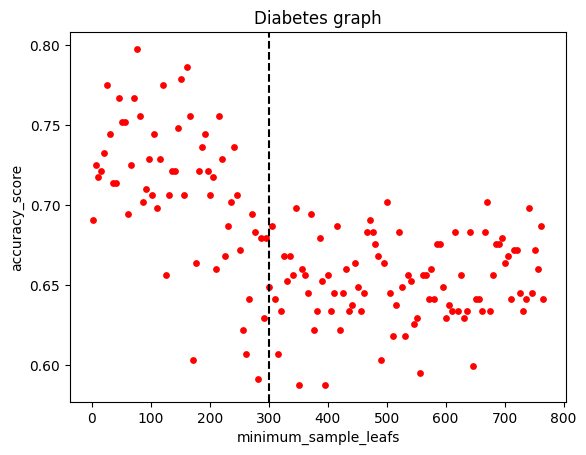

In [13]:
#for diabetes
#counter
msl = 1

#here I am creating a while loop to create decision trees with minimum samples leaf having a step size of 5 each time we create a new decision tree
while msl < dataDiabetes_rows:

    diabetesMLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = msl)
    #random_state needs to be random each time I create a new decision tree since the seed would generate the same split if I dont
    dX_train, dX_test, dY_train, dY_test = train_test_split(dX, dY, test_size=0.34, random_state= random.randint(1, 100000))

    diabetesMLclf = diabetesMLclf.fit(dX_train, dY_train)
    diabetesmYp = diabetesMLclf.predict(dX_test)
    diabetesaccML = accuracy_score(dY_test, diabetesmYp)
    plot.scatter(msl, diabetesaccML, color ="red", s=15)
    
    #step size 5
    msl = msl+5

#here we are just ploting the scatter graph and drawing the line to show different regions
plot.axvline(x = 300, color = 'black', linestyle = "dashed", label = "end of overfitting and start of optimality")
plot.title('Diabetes graph')
plot.ylabel('accuracy_score')
plot.xlabel('minimum_sample_leafs')
plot.show()

Diabetes Graph Explanation: Overfitting, underfitting and optimality regions?
--
Diabetes Graph has overfitting and optimal region respectively

Explaination: Analysing the graph for diabetes, you can see a region of overfitting at around [0, 300]. The optimality region starts right after the overfitting of the graph which starts to form at around [300, 800] which is where the data points stop varing as much and starts to flatline. Overfitting is quite an issue with regarding to decision trees, as we already know from the lectures, having low amount of parameters being set, when creating the decision tree, leads to a high variance in output. Ultimately, this leads to many errors in the final estimation, which in our case is the accuracy_score. We can see though, that once our model starts to be able to get enough training and testing, it starts to predict the accuracy_score much better which is shown in the optimal region. There is not really a underfitting region due to the fact that we have not trained the classifier enough where it would start to underfit data. We would start finding a region of underfitting if we would've continued with more data.

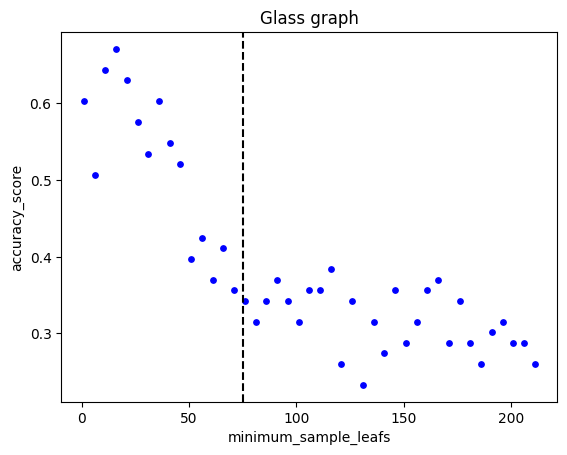

In [14]:
#for glass
#counter
msl = 1


#here I am creating a while loop to create decision trees with minimum samples leaf having a step size of 5 each time we create a new decision tree
while msl < dataGlass_rows:

    glassMLclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = msl)
    #random_state needs to be random each time I create a new decision tree since the seed would generate the same split if I dont
    gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size=0.34, random_state= random.randint(1, 100000))
    
    glassMLclf = glassMLclf.fit(gX_train, gY_train)
    glassmYp = glassMLclf.predict(gX_test)
    glassaccML = accuracy_score(gY_test, glassmYp)
    plot.scatter(msl, glassaccML, color="blue", s=15)
    
    #step size 5
    msl = msl+5

#here we are just ploting the scatter graph and drawing the line to show different regions
plot.axvline(x = 75, color = 'black', linestyle = "dashed", label = "end of overfitting and start of optimality")
plot.title('Glass graph')
plot.xlabel('minimum_sample_leafs')
plot.ylabel('accuracy_score')
plot.show()

Glass Graph Explanation: Overfitting, underfitting and optimality regions?
--
Glass Graph has overfitting and optimal region respectively

Explaination: When looking at the glass graph, we can find an overfitting trend in the [0,75] region. The reason for this overfitted data is because of the decision tree model we are using would overfit data initialy due to the low amount of parameters set during the creation of each decision tree. This is then reflected by the accuracy_score showing us the trend which then follows by an optimal region at around [75, 247]. Since the decision tree has increases the amount of leafs due to the fact that the model is being trained more. This then leads to more accurate score predictions, making the accuracy_scores less varied, as shown between the optimal region and overfitted region. There is no underfitting region because we simply do not have enough data to reach that point in which the classifier would start to underfit the data.